In [159]:
# Modules used for handling and visualization of data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

# Modules used for computer vision
import cv2

# Modules used for handling files
import os
from xml.dom import minidom
import xml.etree.ElementTree as ET

# Modules used for randomization
import random as r

# Constants
TRAIN_DIR = "/kaggle/input/atrw-detection-dataset/atrw_detection_train/trainval"
TEST_DIR =  "/kaggle/input/atrw-detection-dataset/atrw_detection_test/test"
ANNOT_DIR = "/kaggle/input/atrw-detection-dataset/atrw_anno_detection_train(1)/Annotations"

In [160]:
class EDA: 
    
    # Initialization of the variables for EDA.
    def __init__(self):
        self.train_image_paths = []
        self.ROWS = 4
        self.COLS = 1
        self.img = None
    
    # Function to create bounding boxes with xmin, xmax, ymin, ymax.
    def __create_bnd_box(self, bnd_box_dims : list):
        # Traveral through all the dimensions for
        # each tiger.
        for bnd_box_idx in bnd_box_dims:
            
            # Retrieval of the information.
            bnd_box_dim = bnd_box_dims[bnd_box_idx]
            
            # Computation of the length and width of the
            # bounding box.
            dx = bnd_box_dim["xmax"] - bnd_box_dim["xmin"]
            dy = bnd_box_dim["ymax"] - bnd_box_dim["ymin"]
            
            # Annotation of the box onto the image.
            cv2.rectangle(self.img, (bnd_box_dim["xmin"], bnd_box_dim["ymin"]), 
                          (bnd_box_dim["xmin"] + dx, bnd_box_dim["ymin"] + dy), 
                          color=(0,255,255), 
                          thickness=5)
    
    # Extraction of the bounding box dimensions by parsing XML.
    def __get_bndbox_dim(self, id: str):
        bnd_box_dims = dict()
        
        # Parsing the XML annotations file. 
        xml_path = os.path.join(ANNOT_DIR, id+".xml")
        file = ET.parse(xml_path)
        
        # Traversal through the XML Tree.
        root=file.getroot()
        all_tigers = root[6:]
        for tgr_idx in range(0, len(all_tigers)):
            bnd_box_dims[tgr_idx] = dict()
            tgr_dim = all_tigers[tgr_idx][4][0:]
            for dim_idx in range(0, len(tgr_dim)):
                dim_val = tgr_dim[dim_idx].text.strip()
                bnd_box_dims[tgr_idx][tgr_dim[dim_idx].tag] = int(dim_val)
        
        # Creation of bounding boxes.
        self.__create_bnd_box(bnd_box_dims)
    
    # Display of sample images with bounding boxes.
    def display_sample_images(self):
        # Initialization of the subplot.
        c = 0
        fig, axs = plt.subplots(self.ROWS, self.COLS,
                                figsize=(10,10))
        
        # Randomly sampling four images.
        self.train_image_paths = sorted(os.listdir(TRAIN_DIR))
        self.randomly_chosen = r.choices(self.train_image_paths, 
                                         k=4)
        
        # Displaying images with the bounding boxes.
        for img_path in self.randomly_chosen:
            full_img_path = os.path.join(TRAIN_DIR, img_path)
            self.img = mpimg.imread(full_img_path)
            img_id = img_path.split(".")[0]
            self.__get_bndbox_dim(img_id)
            axs[c//self.COLS].imshow(self.img)
            axs[c//self.COLS].set_title(img_path)
            c += 1
            
        fig.suptitle("Sample for Tiger Images")
        plt.show()

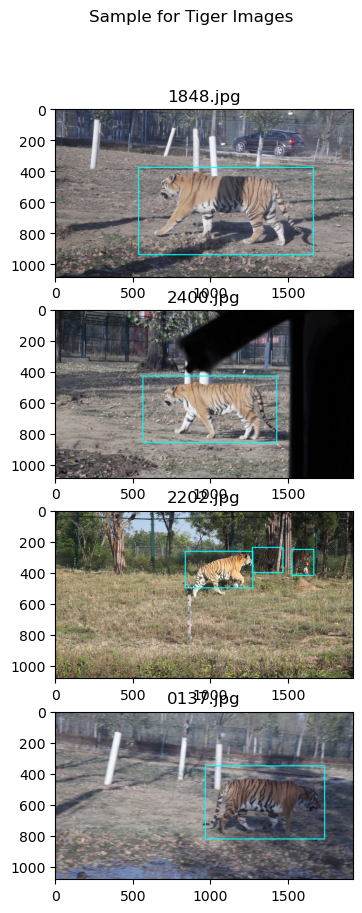

In [161]:
EDA().display_sample_images()